[  1.00000000e-10   1.29154967e-09   1.66810054e-08   2.15443469e-07
   2.78255940e-06   3.59381366e-05   4.64158883e-04   5.99484250e-03
   7.74263683e-02   1.00000000e+00]


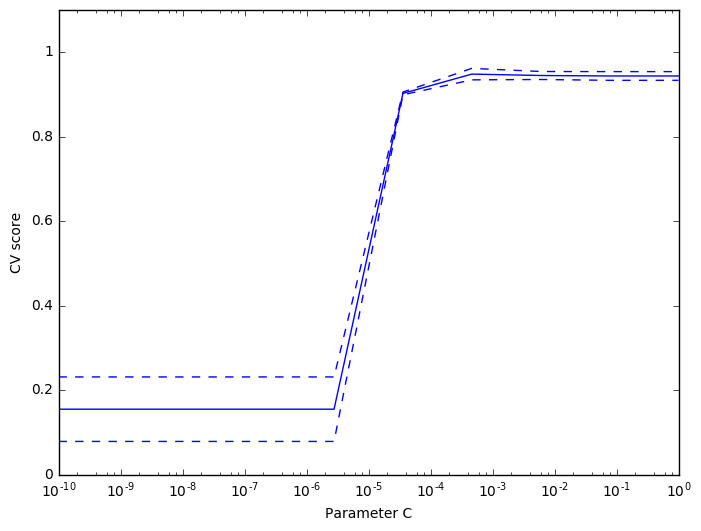

[0.15552937214547155, 0.15552937214547155, 0.15552937214547155, 0.15552937214547155, 0.15552937214547155, 0.90260270247335728, 0.9482070815179453, 0.94490714734074643, 0.94379972762867548, 0.94379972762867548]


In [21]:
# coding=utf-8
"""
svc 遍历使用10个值(10的负十次方 ~ 1)，作为C参数，看score如何变化。

参数C：
C-SVC的惩罚参数C?默认值是1.0
C越大，相当于惩罚松弛变量，希望松弛变量接近0，即对误分类的惩罚增大，趋向于对训练集全分对的情况，这样对训练集测试时准确率很高，但泛化能力弱。
C值小，对误分类的惩罚减小，允许容错，将他们当成噪声点，泛化能力较强。
"""
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

digits = datasets.load_digits()
X = digits.data
y = digits.target

svc = svm.SVC(kernel='linear')
# 默认底数是10
C_s = np.logspace(start=-10, stop=0, num=10)  # base=10， 既10的负10次方 ~ 10的0次方，均分10个
print(C_s)

scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    # cv参数为空，None, 既to use the default 3-fold cross validation,
    this_scores = cross_val_score(svc, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

# Do the plotting
import matplotlib.pyplot as plt

plt.figure(1, figsize=(8, 6))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')

locs, labels = plt.yticks()

plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))  # y轴单位小标

plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)  # 坐标轴范围
plt.show()

print(scores)